# 1. Discrete distributions
## 1.1. Mean and variance
Mean:
$$\mu=E[X]=\sum_k P(X=k)k$$
Variance:
$$\sigma^2=var[X]=E[(X-E[X])^2]=\sum_k P(X=k)(k-\mu)^2$$
Standard deviation:
$$\sigma[X]=\sqrt{var[E]}=\sqrt{\sum_k P(X=k)(k-\mu)^2}$$
Coefficient of variation:
$$
c_v=\frac{\sigma}{\mu}
$$
A corollary:
$$
E[X^2]=\sum_k P(X=k)k^2=\sum_k P(X=k)(k-\mu)^2+2\mu\sum_k P(X=k)k-\mu^2\sum_k P(X=k)=$$
$$\sigma^2+2\mu^2-\mu^2=\mu^2+\sigma^2.$$

## 1.2. Bernoulli distribution
Flipping a coin or any other random event happening with a probability $p$:
$$
Bern(X=1|p)=p
$$$$
Bern(X=0|p)=1-p
$$$$
\mu=E[X]=1\cdot Bern(X=1|p)+0\cdot Bern(X=0|p)=p
$$$$
\sigma=\sqrt{(1-\mu)^2 Bern(X=1|p)+(0-\mu)^2 Bern(X=0|p)}=\sqrt{(1-p)^2+p^2(1-p)}=\sqrt{p(1-p)}.
$$

In [2]:
import numpy as np
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
random.seed(2015)
sample = stats.bernoulli.rvs(p = 0.5, size = 25)
print(sample)
sum(sample)

[1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0]


12

## 1.3. Binomial distribution
Number of successes of a series of random events
$$
Bin(X=k|n,p)=C^k_n p^k (1-p)^{n-k},
$$$$
C^k_n=\frac{n!}{(n-k)!k!}
$$$$
\mu=E[X]=pn
$$$$
\sigma[X]=\sqrt{np(1-p)}
$$

In [4]:
print(stats.binom.pmf(12, p=0.5, n=25))

0.154981017113


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<Container object of 25 artists>

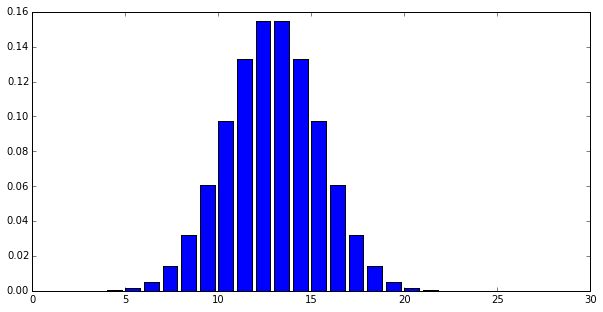

In [5]:
%pylab inline
plt.figure(figsize = (10,5))
k=range(1,26)
plt.bar(k,stats.binom.pmf(k, p=0.5, n=25))

## 1.4. Poisson distribution
Number of events happening with a certain frequency $\lambda$ (like device failures, crime, disasters)
$$
Poi(X=k|\lambda)=e^{-\lambda}\frac{\lambda^k}{k!}
$$$$
E[X]=var[X]=\lambda=\mu=\sigma^2
$$

Example: Murder rate in Newark is known to be 40 per 100.000 people per year

<Container object of 200 artists>

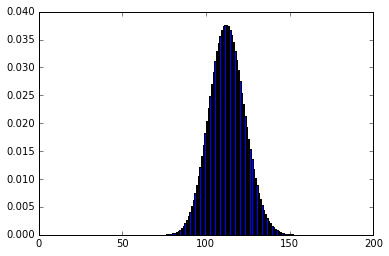

In [6]:
plt.figure()
k=range(0,200)
plt.bar(k,stats.poisson.pmf(k, mu=40.0/100000*280000))

Example: 25 named hurricanes hit Bermuda during 22 years from 1991 till 2012. Given this statistics, what is the probability of getting 3 hurricanes during the same year (it actually happened in 1998)?

In [ ]:
plt.figure()
k=range(0,7)
plt.bar(k,stats.poisson.pmf(k, mu=25.0/22))
print(stats.poisson.pmf(3, mu=25.0/22))

# 2. Continous distributions

## 2.1. Mean and variance, quantiles

Mean:
$$
\mu=E[X]=\int\limits_x x p(x)dx=\int x d P
$$
Variance:
$$
\sigma^2=var[X]=E[(X-E[X])^2]=\int\limits_x (x-\mu)^2 p(x)dx
$$
Quantile:
$$
x_\alpha=F^{-1}(\alpha); P(X\leq x_\alpha)=\alpha
$$
$$
E[X+Y]=E[X]+E[Y]
$$$$
E[qX]=qE[X]; var[qX]=q^2 var[X].
$$
The following holds for independent variables X and Y only (i.e. $P(Y=y|X=x)=P(Y=y)$)
$$
var[X+Y]=var[X]+var[Y], \sigma[X+Y]=\sqrt{\sigma[X]^2+\sigma[Y]^2}.
$$$$
E[XY]=E[X]E[Y]
$$

## 2.2. Uniform distribution

Random variable uniformly distributed over a certain interval
$$
Unif(x|a,b)=\frac{1}{b-a} I(a\leq x\leq b)
$$
$$
\mu=E[X]=\frac{a+b}{2}
$$$$
\sigma[X]=\frac{(b-a)}{2\sqrt{3}}
$$

(0, 1.1)

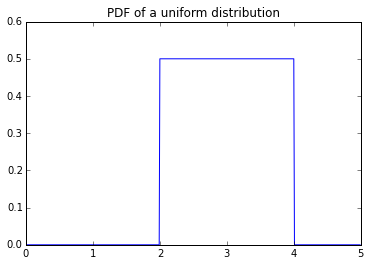

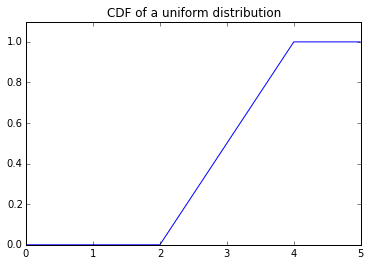

In [7]:
plt.figure()
x=np.array(range(0,500))*0.01
a=2
b=4
w=b-a
plt.title('PDF of a uniform distribution')
plt.plot(x,stats.uniform.pdf(x,a,w))
plt.ylim([0,0.6])
plt.figure()
plt.title('CDF of a uniform distribution')
plt.plot(x,stats.uniform.cdf(x,a,w))
plt.ylim([0,1.1])

## 2.3. Normal distribution

A very common continous distribution - happens to represent a number of real-world processes (physics, biology, sociology, economics etc): characteristics of people and animals, errors of astronomical observations, income etc.

### Central limit theorem: 
a sample average $\overline{X}=\frac{\sum\limits_i X_i}{N}$ of a random sample of N instances ${X_1,X_2,...,X_N}$ of a random variable $X$ ($E[X]=\mu$, $std[X]=\sigma$) has a distribution close to normal ${\cal N}(\overline{X}|\mu,\sigma^2/N)$ for large $N$. 

Rigorously
$$
\sqrt{N}(\overline{X}-\mu)\to {\cal N}(0,\sigma^2),
$$
while $N\to\infty$.

Probability density function:
$$
{\cal N}(X=x|\mu,\sigma^2)=\phi(x|\mu,\sigma^2)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

Cumulative distribution function
$$
\Phi(x|\mu,\sigma^2)=\int\limits_{-\infty}^x \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(t-\mu)^2}{2\sigma^2}}dt
$$


(0, 1.1)

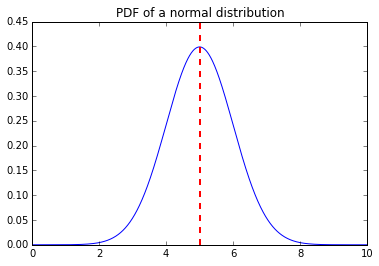

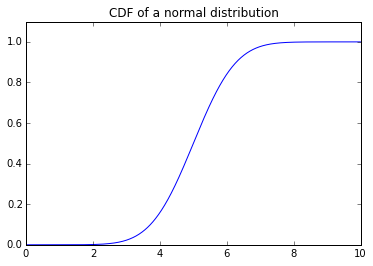

In [8]:
plt.figure()
x=np.array(range(0,1000))*0.01
mu=5
sigma=1
plt.title('PDF of a normal distribution')
plt.plot(x,stats.norm.pdf(x,mu,sigma))
plt.axvline(5, color='r', ls='--', lw=2.0)
plt.ylim([0,0.45])
plt.figure()
plt.title('CDF of a normal distribution')
plt.plot(x,stats.norm.cdf(x,mu,sigma))
plt.ylim([0,1.1])

In many real-world cases not the quantity considered but rather its logarithm happens to be distributed normally (e.g. activity of customers, population of cities etc)
### lognormal distribution: 
$log(X)\sim {\cal N}(\mu,\sigma^2)$

(0, 1.1)

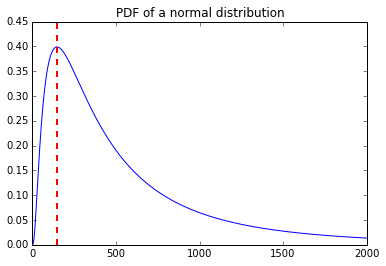

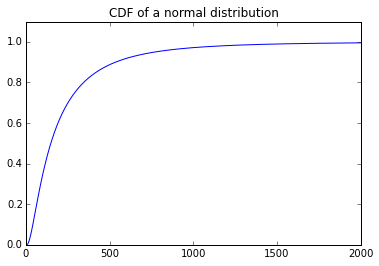

In [9]:
plt.figure()
x=np.array(range(1,2000))*1.0
mu=5
sigma=1
plt.title('PDF of a normal distribution')
plt.plot(x,stats.norm.pdf(log(x),mu,sigma))
plt.axvline(exp(mu), color='r', ls='--', lw=2.0)
plt.ylim([0,0.45])
plt.figure()
plt.title('CDF of a normal distribution')
plt.plot(x,stats.norm.cdf(log(x),mu,sigma))
plt.ylim([0,1.1])

## 2.4. Other useful distributions

### Logistic distribution

Probability Density Function
$Logist(X=x)=F^\prime(x)=\displaystyle{\frac{\exp(-x)}{1+\exp(-x)}}$

Cumulative Density Function
$F(x)=\displaystyle{\frac{1}{1+\exp(-x)}}$

$$
\mu=E[X]=0, \sigma[X]=\pi/\sqrt{3}.
$$

### Exponential distribution

Probability Density Function
$$
Exp(X=x|\lambda)=\left\{\begin{array}{ll}\lambda e^{-\lambda x}, & x\geq 0\\0,& x<0 \end{array}\right.
$$

Cumulative Density Function
$$
F(x)=\left\{\begin{array}{ll}1-e^{-\lambda x}, & x\geq 0\\0, & x<0\end{array}\right.
$$

$$
\mu=E[X]=\sigma[X]=1/\lambda
$$

### Gamma, Beta, Laplace, Pareto...

# 3. Correlation

Covarience:
$$
cov(X,Y)=E[(X-E[X])(Y-E[Y])]
$$
Pearson’s correlation coefficient:
$$
corr(X,Y)=\frac{cov(X,Y)}{\sigma[X] \sigma[Y]} 
$$

In [ ]:
from scipy.stats.stats import pearsonr
random.seed(2015)
x=stats.uniform.rvs(0,1,100)
y=x+stats.uniform.rvs(0,1,100)
corr=pearsonr(x,y)[0]
print('Correlation={0}'.format(corr))
plt.figure()
plt.plot(x,y,'og')
plt.xlabel('x')
plt.ylabel('y')

# 4. Optimization

Consider several points on the map


In [ ]:
random.seed(2015)
x=stats.uniform.rvs(0,10,20)
y=stats.uniform.rvs(0,10,20)
plt.figure()
plt.plot(x,y,'go')
plt.xlim(0,10)
plt.ylim(0,10)

and look for a such a location that sum of square distances from it to the given points is minimal:
$$
\sum\limits_i \left[(x_i-x^*)^2+(y_i-y^*)^2\right]\to min
$$

In [ ]:
from scipy.optimize import minimize

def f(params):
    x0=params[0]
    y0=params[1]
    return sum(np.square(x-x0))+sum(np.square(y-y0))

plt.figure()
plt.plot(x,y,'go')
plt.xlim(0,10)
plt.ylim(0,10)
prevpoint=[0, 1];

def visiter(params):
    global prevpoint
    plt.plot([prevpoint[0],params[0]],[prevpoint[1],params[1]],'b:o')
    plt.plot(params[0],params[1],'ro')
    prevpoint=params
    print(params)
    
    

minimize(f, prevpoint, method='TNC', options={'disp': True}, callback=visiter)

Optimization problem:
$$
argmax_X F(x)\to min
$$

Common family of iterative optimization methods is known as "gradient descent":
$$
x^{j+1}=x^j-\lambda_j \triangledown F(x^j),
$$

where $\lambda_j$ are certain real numbers picked up with respect to $F(x^{j+1})<F(x^j)$.

Although specifically for the problem above a more streighforward analytic solution is available.

### Quantiles - optimization example

Consider a protective dumb construction problem. Let maximal hight of a storm surge ecountered per period of damb usage to be a normally distributed random value $H\sim {\cal N}(10,3^2)$, ft, a cost of a protective damb erection depend on its hight $h$ as $C(h)=\$10M+\$1M\cdot h^2$ while expected amount of loss is damb protective capacity is exceeded - $L=\$1B$. What is the optimal hight $h^*$ of the damb and how reliable this dumb should be? 

Let $\alpha$ be a reliability of the damb, i.e. $1-\alpha$ be a probability of its failure. Then $h^*(alpha)=\Phi^{-1}(\alpha|10,3^2)$, average expectation for the loss is $(1-\alpha) L$, while cost of the damb erection is $C(h^*)$. Then optimal hight should minimize the total expence estimated as
$$
C(h^*(\alpha))+(1-\alpha) L\to min
$$

In [ ]:
def C(h):
    return 10+power(h,2)

def h(a):
    return stats.norm.ppf(a,10,3)

def total(a):
    return C(h(a))+(1-a)*1000

x=np.array(range(0,1000))*0.001
y=map(total,x)
plt.figure(figsize = (15,5))
plt.title('Total expence estimate vs damb reliability')
plt.plot(x,y)
y=map(total,x)
print('alpha={0}'.format(a0))
print('h*={0}'.format(h(a0)))
plt.axvline(a0, color='r', ls='--', lw=2.0)
